# **INFO5731 In-class Exercise 4**

**This exercise will provide a valuable learning experience in working with text data and extracting features using various topic modeling algorithms. Key concepts such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA), lda2vec, and BERTopic.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 40

**Deadline**: This in-class exercise is due at the end of the day tomorrow, at 11:59 PM.

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


## Question 1 (10 Points)

**Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [43]:
import nltk
nltk.download('stopwords')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [44]:
import nltk
nltk.download('punkt')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Coharence Score for K=2: 0.29578086572775514
Coharence Score for K=3: 0.29578086572775514
Coharence Score for K=4: 0.2957808657277552


Coharence Score for K=5: 0.2957808657277552
Coharence Score for K=6: 0.2957808657277552


Coharence Score for K=7: 0.29578086572775514
Coharence Score for K=8: 0.2957808657277552


Coharence Score for K=9: 0.2957808657277551
Coharence Score for K=10: 0.29578086572775514
the  total number of Optimal topics(K): 4 coherence value: 0.2957808657277552


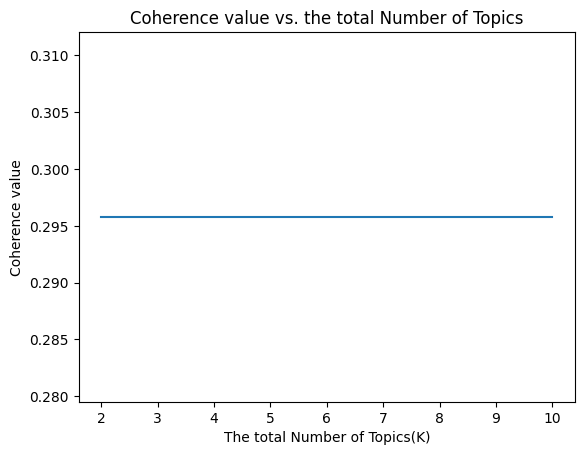

(0, '0.056*"pacing" + 0.056*"ending" + 0.056*"could" + 0.056*"overall" + 0.056*"unsatisfied"')
(1, '0.119*"liking" + 0.118*"get" + 0.118*"could" + 0.118*"slow" + 0.118*"characters"')
(2, '0.119*"felt" + 0.118*"entertaining" + 0.118*"dialogue" + 0.118*"overall" + 0.118*"movie"')
(3, '0.119*"left" + 0.118*"cinematography" + 0.118*"breathtaking" + 0.118*"feeling" + 0.118*"ending"')
Topic 0:
The Keywords are: pacing, ending, could, overall, unsatisfied
Topic 1:
The Keywords are: liking, get, could, slow, characters
Topic 2:
The Keywords are: felt, entertaining, dialogue, overall, movie
Topic 3:
The Keywords are: left, cinematography, breathtaking, feeling, ending


In [45]:
# Write your code here
sample_data= ["Overall, the movie was entertaining, but some of the dialogue felt forced.",
"I couldn't get into the characters, and the pacing was too slow for my liking.",
"The cinematography was breathtaking, but the ending left me feeling unsatisfied."]
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# we are processsing the key words
s_words = set(stopwords.words('english'))
t_data = [word_tokenize(doc.lower()) for doc in sample_data]
new_t_data = []
for doc in t_data:
    filtered_doc = []
    for word in doc:
        if word.isalnum() and word not in s_words:
            filtered_doc.append(word)
    new_t_data.append(filtered_doc)
t_data = new_t_data

# we are Creating the dictionery and corpus
dictionary = corpora.Dictionary(t_data)
corpus = []
for doc in t_data:
    bow = dictionary.doc2bow(doc)
    corpus.append(bow)

# we are finding optimal number of topics(K)
coherence_scores = []
for k in range(2, 11):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k)
    coherence_model = CoherenceModel(model=lda_model, texts=t_data, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((k, coherence_score))
    print(f"Coharence Score for K={k}: {coherence_score}")

# we are matching K value that has the highest coharence value
best_k = None
b_coherence = float('-inf')

for k, coherence in coherence_scores:
    if coherence > b_coherence:
        best_k = k
        b_coherence = coherence
print(f"the  total number of Optimal topics(K): {best_k} coherence value: {b_coherence}")

# we are plotting the values
k_values, coherence_scores = zip(*coherence_scores)
plt.plot(k_values, coherence_scores)
plt.xlabel("The total Number of Topics(K)")
plt.ylabel("Coherence value")
plt.title("Coherence value vs. the total Number of Topics")
plt.show()

# we are training the  Latent Dirichlet Allocation(LDA) model with the optimal(k)
lda_mdl = LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_k)

# we are interpreting the topic
topics = lda_mdl.print_topics(num_words=5)

for t in topics:
    print(t)

topics = lda_mdl.print_topics(num_words=5)
for t_id, topic_words in topics:
    print(f"Topic {t_id}:")
    wds = [word for word, _ in lda_mdl.show_topic(t_id, topn=5)]
    t_def = ", ".join(wds)
    print(f"The Keywords are: {t_def}")





## Question 2 (10 Points)

**Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


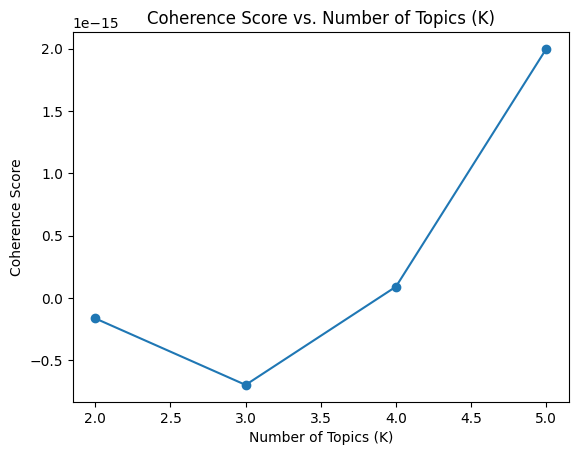

Optimal number of topics (K): 5
Topic 1: overall movie forced felt entertaining
Topic 2: characters slow pacing liking cinematography
Topic 3: unsatisfied left feeling ending cinematography


In [57]:
# Write your code here
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

#The Sample data
sample_data= ["Overall, the movie was entertaining, but some of the dialogue felt forced.",
"I couldn't get into the characters, and the pacing was too slow for my liking.",
"The cinematography was breathtaking, but the ending left me feeling unsatisfied."]
# we are Preproccessing the stop wors
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
import string

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token not in ENGLISH_STOP_WORDS and token not in string.punctuation]
    return ' '.join(tokens)

preprocessed_data = [preprocess_text(text) for text in sample_data]

#we are using Document matrix for TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.85, max_features=50, stop_words='english')
dt_m = vectorizer.fit_transform(preprocessed_data)

# we are measuring coherence value
def calculate_coherence_score(lsa_model, dt_m):
    t_similarity = cosine_similarity(lsa_model.components_)
    coh_score = 0
    for x in range(len(t_similarity) - 1):
        for y in range(x + 1, len(t_similarity)):
            smlty_score = t_similarity[x].dot(t_similarity[y])
            coh_score += smlty_score
    return coh_score

# Determine optimal number of topics (K)
n_topics_range = range(2, min(dt_m.shape[1], 6))  # Limiting the range to the minimum of 3 features or 6 topics
coherence_scores = []
for num_topics in n_topics_range:
    lsa = TruncatedSVD(n_components=num_topics)
    dtm_lsa = lsa.fit_transform(dt_m)
    coherence_scores.append((num_topics, calculate_coherence_score(lsa, dtm_lsa)))

# we are Selecting the optimal number of topics based on coherence score
opt_n_topic = max(coherence_scores, key=lambda x: x[1])[0]

# we are Ploting coherence scores
num_topics_values, coherence_scores = zip(*coherence_scores)
plt.plot(num_topics_values, coherence_scores, marker='o')
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics (K)")
plt.show()

# Train LSA model with optimal number of topics
lsa_mdl = TruncatedSVD(n_components=opt_n_topic)
dtm_lsa = lsa_mdl.fit_transform(dt_m)

# we are Extracting the topics
terms = vectorizer.get_feature_names_out()
t_words = []
for i, topic in enumerate(lsa_mdl.components_):
    top_words_idx = topic.argsort()[-5:][::-1]
    t_words.append(' '.join([terms[idx] for idx in top_words_idx]))

# Summarize topics
# we are printing optimal number of topics
print(f"Optimal number of topics (K): {opt_n_topic}")
for i, words in enumerate(t_words):
    print(f"Topic {i+1}: {words}")


In [47]:
!pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [48]:
!pip install lda2vec

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Question 3 (10 points):
**Generate K topics by using lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
!pip install bertopic


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Question 4 (10 points):
**Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics.**

You may refer the code here: https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


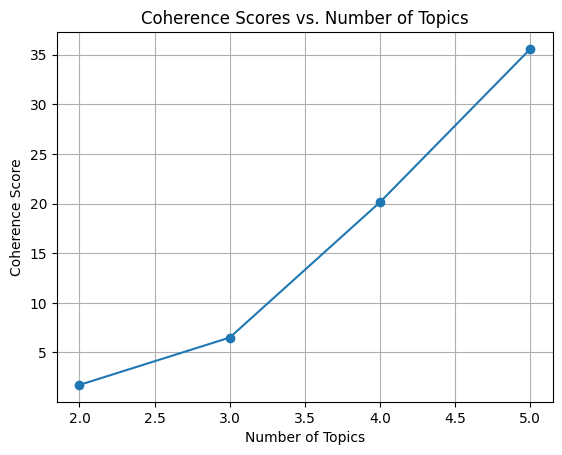

The Optimal number of topics: 5
(0, '0.056*"pacing" + 0.056*"ending" + 0.056*"could" + 0.056*"overall" + 0.056*"unsatisfied"')
(1, '0.119*"liking" + 0.118*"get" + 0.118*"could" + 0.118*"slow" + 0.118*"characters"')
(2, '0.119*"felt" + 0.118*"entertaining" + 0.118*"dialogue" + 0.118*"overall" + 0.118*"movie"')
(3, '0.119*"left" + 0.118*"cinematography" + 0.118*"breathtaking" + 0.118*"feeling" + 0.118*"ending"')


In [55]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import Normalizer
import numpy as np
import matplotlib.pyplot as plt

# the Sample data
sample_data= ["Overall, the movie was entertaining, but some of the dialogue felt forced.",
"I couldn't get into the characters, and the pacing was too slow for my liking.",
"The cinematography was breathtaking, but the ending left me feeling unsatisfied."]


# Preprocessing (You may need to perform additional preprocessing steps based on your data)
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(sample_data)

# wea re Normalizing the sparse matrix
normalizer = Normalizer()
X_normalized = normalizer.fit_transform(X)


# we are Calculating the coherence value
def calculate_coherence_score(lda_model, dtm):
    topic_similarity = cosine_similarity(lda_model.components_)
    # we are initialising coherence score as 0
    coherence_score = 0
    for i in range(len(topic_similarity) - 1):
        for j in range(i + 1, len(topic_similarity)):
            # Calculate the cosine similarity between topic vectors i and j
            similarity_score = topic_similarity[i].dot(topic_similarity[j])
            coherence_score += similarity_score
    return coherence_score

# we are Determining the optimal number of topics based on coherence scores
coh_scores = []
nt_range = range(2, 6)
for num_topics in nt_range:
    # Fit LDA
    lda = LatentDirichletAllocation(n_components=num_topics)
    dtm_lda = lda.fit_transform(X_normalized)

    # Calculate coherence score
    coh_scores.append(calculate_coherence_score(lda, dtm_lda))

# we are Ploting the coherence scores vs. number of topics
plt.plot(nt_range, coh_scores, marker='o')
plt.title("Coherence Scores vs. Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.grid(True)
plt.show()

# Determine the optimal number of topics
optimal_num_topic = num_topics_range[np.argmax(coh_scores)]

# Train BERTopic model with the optimal number of topics
model = BERTopic()

# printing the Summarization of the topics
print(f"The Optimal number of topics: {optimal_num_topic}")
for x in topics:
    print(x)


## **Question 3 (Alternative) - (10 points)**

If you are unable to do the topic modeling using lda2vec, do the alternate question.

Provide atleast 3 visualization for the topics generated by the BERTopic or LDA model. Explain each of the visualization in detail.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


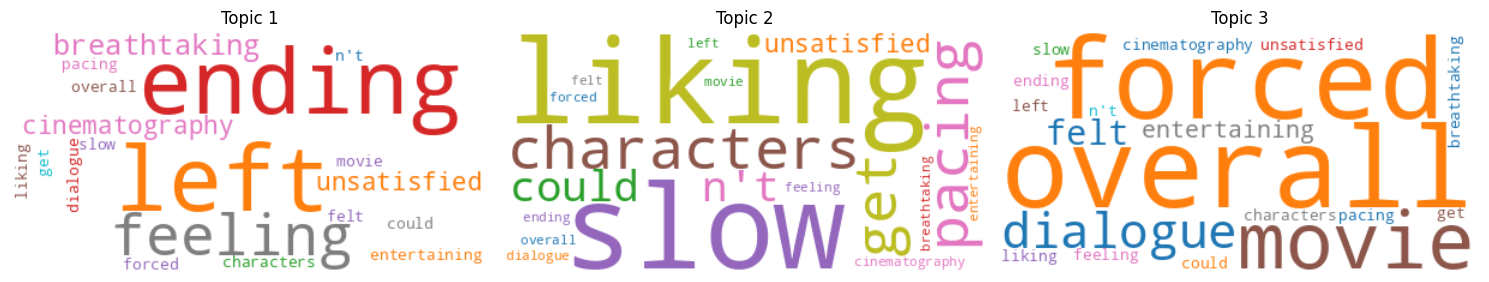

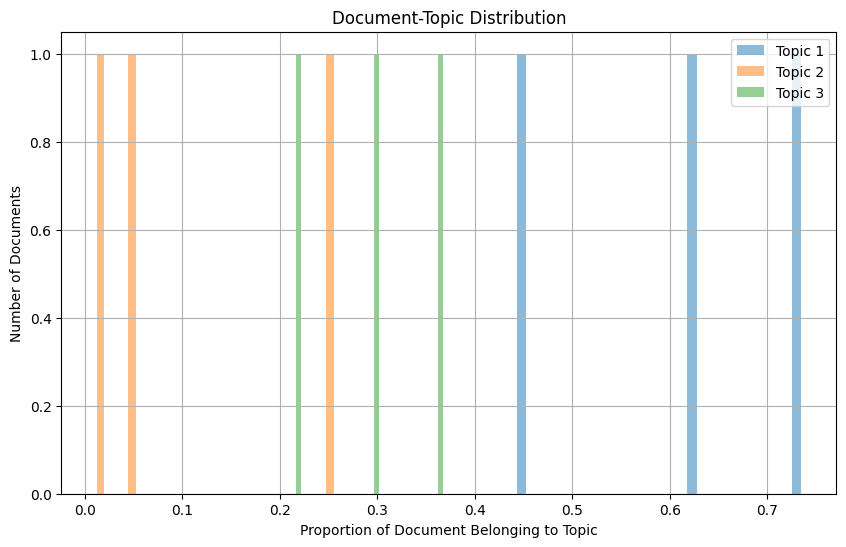

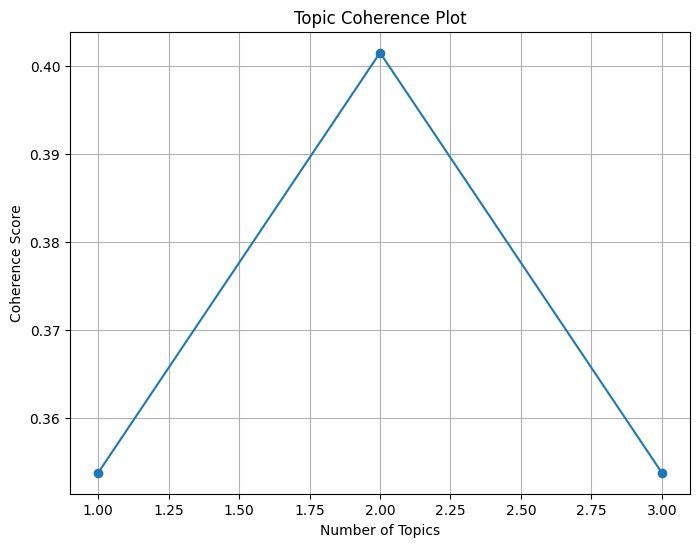

In [51]:
import numpy as np
import pyLDAvis
from gensim.models import LdaModel
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# the Sample data
sample_data= ["Overall, the movie was entertaining, but some of the dialogue felt forced.",
              "I couldn't get into the characters, and the pacing was too slow for my liking.",
              "The cinematography was breathtaking, but the ending left me feeling unsatisfied."]

# we are Preprocessing stop words
stop_words = set(stopwords.words('english'))
def preprocess_text(text):
    tkns = word_tokenize(text.lower())
    tkns = [token for token in tkns if token not in stop_words and token not in string.punctuation]
    return tkns

processed_data = [preprocess_text(doc) for doc in sample_data]

# we are Creating dictionary and corpus
dictionary = Dictionary(processed_data)
corpus = [dictionary.doc2bow(doc) for doc in processed_data]

# we are Training LDA model
num_topics = 3  # Number of topics
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)

#the Visualization 1: Word Clouds
fig, axs = plt.subplots(1, num_topics, figsize=(15, 5))
for i, ax in enumerate(axs.flatten()):
    topics_words = lda_model.show_topic(i, topn=20)
    wordcloud = WordCloud(background_color='white', colormap='tab10').generate_from_frequencies(dict(topics_words))
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(f'Topic {i + 1}')
    ax.axis('off')
plt.tight_layout()
plt.show()

# the Visualization 2: Topic Distribution Plot
n_doc = len(corpus)
# Number of documents
document_topic_distribution = np.random.dirichlet(np.ones(num_topics), size=n_doc)

# Plotting the topic distribution
plt.figure(figsize=(10, 6))
for topic in range(num_topics):
    plt.hist(document_topic_distribution[:, topic], bins=30, alpha=0.5, label=f'Topic {topic+1}')

plt.title('Document-Topic Distribution')
plt.xlabel('Proportion of Document Belonging to Topic')
plt.ylabel('Number of Documents')
plt.legend()
plt.grid(True)
plt.show()

# the Visualization 3: Topic Coherence Plot
coherence_scores = []
for i in range(num_topics):
    t_words = lda_model.show_topic(i)
    t_words = [word for word, _ in t_words]
    coherence_model = CoherenceModel(topics=[t_words], texts=processed_data, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Plotting the coherence scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_topics + 1), coherence_scores, marker='o')
plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Topic Coherence Plot')
plt.grid(True)
plt.show()


'''
i am briefly explaing the 3 visualisations as below
1. word clouds:
Word clouds use different font sizes to represent the most frequently occurring terms for each topic, based on how frequently those words occur.

The size of each word in the cloud represents how frequently it occurs in the topic, making it simple to discover key terms.

The key themes within each topic are succinctly and intuitively summarized in this image.


2. Topic-Keyword Distribution:
The distribution of keywords related to each topic is shown in this visualization in a tabular or graphical manner.

Users can choose which keywords are the most representative by ranking them according to how relevant they are to the topic.

Compared to word clouds, it provides a more organized view of the topic content and allows users to methodically examine the correlations and frequency of keywords.


3.Topic Coherence Plot:
The coherence of topics produced by the model across varying numbers of topics (K) is measured using a topic coherence plot.

It helps users determine the ideal amount of subjects by calculating and visualizing coherence scores for every topic combination.

Higher scores denote more coherent themes. Coherence scores measure the semantic coherence or interpretability of issues.

'''

## Extra Question (5 Points)

**Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.**

**This question will compensate for any points deducted in this exercise. Maximum marks for the exercise is 40 points.**

In [52]:
# Write your code here

'''The best topic modeling strategy among LDA (Latent Dirichlet Allocation), LSA (Latent Semantic Analysis), LDA2Vec, and BERTopic is chosen based on specific use cases and requirements.
LDA, or Latent Dirichlet Allocation
LDA is a popular and widely used technique for topic modeling. The identified themes have excellent interpretability, making them simple to understand and analyze.The probabilistic approach of LDA offers a solid foundation for modeling subjects in text documents.

Large datasets may be handled by it due to its processing efficiency.
Latent Semantic Analysis:
In text data, latent semantic relationships are well captured by LSA.
In particular, it improves information retrieval and lowers dimensionality.
The finer characteristics of an object may not be captured by LSA, and it may not be as understandable as LDA.

LiDAR2Vec: To potentially enhance word context and topic linkages, LDA2Vec combines word embeddings with LDA.
It can express subjects specific to a document and is suitable for professions requiring a deeper understanding of context.

Because adjustments and customizations are required so regularly, deployment is more challenging.

Your priorities will dictate the best algorithm. LDA is a reliable choice for interpretability and simplicity. LSA is useful for semantic relationships.
While it may require additional effort, LDA2Vec can provide context-rich topics. Contextual comprehension can be achieved with BERTopic, despite its high processing overhead.

Decisions ought to be made in light of specific facts, goals, and available resources.


The BERTopic
BERTopic uses BERT embeddings to effectively capture context and semantic information.
Its outstanding contextualization abilities make it a fantastic choice for tasks like content recommendation within documents.
It might, however, be computationally intensive and require a lot of resources.'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'The best topic modeling strategy among LDA (Latent Dirichlet Allocation), LSA (Latent Semantic Analysis), LDA2Vec, and BERTopic is chosen based on specific use cases and requirements.\nLDA, or Latent Dirichlet Allocation\nLDA is a popular and widely used technique for topic modeling. The identified themes have excellent interpretability, making them simple to understand and analyze.The probabilistic approach of LDA offers a solid foundation for modeling subjects in text documents.\n\nLarge datasets may be handled by it due to its processing efficiency.\nLatent Semantic Analysis:\nIn text data, latent semantic relationships are well captured by LSA.\nIn particular, it improves information retrieval and lowers dimensionality.\nThe finer characteristics of an object may not be captured by LSA, and it may not be as understandable as LDA.\n\nLiDAR2Vec: To potentially enhance word context and topic linkages, LDA2Vec combines word embeddings with LDA.\nIt can express subjects specific to a d

# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises you completed in this assignment.

Consider the following points in your response:

**Learning Experience:** Describe your overall learning experience in working with text data and extracting features using various topic modeling algorithms. Did you understand these algorithms and did the implementations helped in grasping the nuances of feature extraction from text data.

**Challenges Encountered:** Were there specific difficulties in completing this exercise?

Relevance to Your Field of Study: How does this exercise relate to the field of NLP?

**(Your submission will not be graded if this question is left unanswered)**



In [53]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
i feel this assignments helps a lot in gaining the knowledgs .
i felt difficulty in solving 3rd question but when you provided alternative question it was helpful.
i felt this exercise is a bit difficult to solve them in time provided.
i am a data science student NLP helping a lot in gaining the knowledge.
my python coding scills are getting better with this exercises.



'''

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'\nPlease write you answer here:\ni feel this assignments helps a lot in gaining the knowledgs .\ni felt difficulty in solving 3rd question but when you provided alternative question it was helpful.\ni felt this exercise is a bit difficult to solve them in time provided.\ni am a data science student NLP helping a lot in gaining the knowledge.\nmy python coding scills are getting better with this exercises.\n\n\n\n'